# Import Libs

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys, os, scipy, sklearn
import sklearn.metrics, sklearn.preprocessing, sklearn.model_selection

In [151]:
mpl.rcParams['font.size'] = 14

# Load Data

In [135]:
data_folder = './data/chapter_3/'
data_files = os.listdir(data_folder)
display('chapter_3 files:',
        data_files)
for file_name in data_files:
    if '.csv' in file_name:
        globals()[file_name.replace('.csv','')] = pd.read_csv(data_folder+file_name, 
                                                              index_col=0).reset_index(drop=True)
        print(file_name)
        display(globals()[file_name.replace('.csv','')].head(), globals()[file_name.replace('.csv','')].shape)

'chapter_3 files:'

['x_scawed_full.pickle',
 'db_full.pickle',
 'banksim.csv',
 'x_scaled.pickle',
 'banksim_adj.csv',
 'labels_full.pickle',
 'labels.pickle']

banksim.csv


,age,gender,category,amount,fraud
0,3,F,es_transportation,49.71,0
1,4,F,es_health,39.29,0
2,3,F,es_transportation,18.76,0
3,4,M,es_transportation,13.95,0
4,2,M,es_transportation,49.87,0


(7200, 5)

banksim_adj.csv


,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,3,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4,39.29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,13.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,49.87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


(7189, 18)

In [136]:
df = banksim

# Exploring your data




In the next exercises, you will be looking at bank payment transaction data. The financial transactions are categorized by type of expense, as well as the amount spent. Moreover, you have some client characteristics available such as age group and gender. Some of the transactions are labelled as fraud; you'll treat these labels as given and will use those to validate the results.

When using unsupervised learning techniques for fraud detection, you want to distinguish normal from abnormal (thus potentially fraudulent) behavior. As a fraud analyst to understand what is "normal", you need to have a good understanding of the data and its characteristics. Let's explore the data in this first exercise.

In [137]:
# Get the dataframe shape
df.shape

# Display the first 5 rows
df.head()

# Groupby categories and take the mean
display(df.groupby('category').mean().sort_values('fraud'))

,amount,fraud
category,,
es_contents,55.170000,0.000000
es_food,35.216050,0.000000
es_transportation,27.422014,0.000000
es_fashion,59.780769,0.020619
es_barsandrestaurants,43.841793,0.022472
es_wellnessandbeauty,66.167078,0.060606
es_hyper,46.788180,0.125000
es_tech,132.852862,0.179487
es_home,120.688317,0.208333


# Customer segmentation



In this exercise you're going to check whether there are any obvious patterns for the clients in this data, thus whether you need to segment your data into groups, or whether the data is rather homogenous.

You unfortunately don't have a lot client information available; you can't for example distinguish between the wealth levels of different clients. However, there is data on **age ** available, so let's see whether there is any significant difference between behavior of age groups.

In [138]:
# Group by age groups and get the mean
display(df.groupby('age').mean())

# Count the values of the observations in each age group
display(df['age'].value_counts())

,amount,fraud
age,,
0,49.468935,0.050000
1,35.622829,0.026648
2,37.228665,0.028718
3,37.279338,0.023283
4,36.197985,0.035966
5,37.547521,0.023990
6,36.700852,0.022293
U,39.117000,0.000000


2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64

# Using statistics to define normal behavior

In the previous exercises we saw that fraud is more prevalent in certain transaction categories, but that there is no obvious way to segment our data into for example age groups. This time, let's investigate the average amounts spend in normal transactions versus fraud transactions. This gives you an idea of how fraudulent transactions differ structurally from normal transactions.

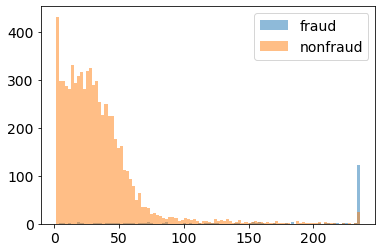

In [139]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud', bins=100)
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud', bins=100)
plt.legend()
plt.show()

# Label and One Hot Encode

In [140]:
label_encoder_dict = {}
for label in df.columns:
    #only encode non-float/non-int columns
    if 'float' not in str(type(df[label].iloc[0])) and 'int' not in str(type(df[label].iloc[0])):
        label_encoder_dict[label] = sklearn.preprocessing.LabelEncoder()
        label_encoder_dict[label].fit(df[label])
        df[label] = label_encoder_dict[label].transform(df[label])
label_encoder_dict

{'age': LabelEncoder(), 'gender': LabelEncoder(), 'category': LabelEncoder()}

In [141]:
OneHotEncoder_dict={}
for label in ['gender','category']:
    OneHotEncoder_dict[label] = sklearn.preprocessing.OneHotEncoder()
    OneHotEncoding = OneHotEncoder_dict[label].fit_transform(label_encoder_dict[label].inverse_transform(df[label]).reshape(-1,1)).toarray()
    OneHotEncoding = pd.DataFrame(OneHotEncoding, 
                                  columns =  OneHotEncoder_dict[label].categories_[0])
    
    df = df.drop(columns=label)
    df = pd.concat((df, OneHotEncoding),axis=1)

In [142]:
#Drop non-male encodings
df = df.drop(columns=['E','F','U', 'es_wellnessandbeauty'])

In [143]:
display(df.head(), df.shape)

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,3,49.71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,39.29,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,18.76,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,13.95,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,49.87,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


(7200, 18)

# Scaling the data



For ML algorithms using distance based metrics, it is crucial to always scale your data, as features using different scales will distort your results. K-means uses the Euclidian distance to assess distance to cluster centroids, therefore you first need to scale your data before continuing to implement the algorithm. Let's do that first.

Available is the dataframe df from the previous exercise, with some minor data preparation done so it is ready for you to use with sklearn. The fraud labels are separately stored under labels, you can use those to check the results later. numpy has been imported as np.

In [145]:
# Take the float values of df for X
X = df.drop(columns=['fraud']).values.astype(np.float)

# Define the scaler and apply to the data
scaler = sklearn.preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering


A very commonly used clustering algorithm is K-means clustering. For fraud detection, K-means clustering is straightforward to implement and relatively powerful in predicting suspicious cases. It is a good algorithm to start with when working on fraud detection problems. However, fraud data is oftentimes very large, especially when you are working with transaction data. MiniBatch K-means is an efficient way to implement K-means on a large dataset, which you will use in this exercise.

The scaled data from the previous exercise, X_scaled is available. Let's give it a try.

In [148]:
import sklearn.cluster

In [149]:
# Define the model 
kmeans = sklearn.cluster.MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

# Elbow method


In the previous exercise you've implemented MiniBatch K-means with 8 clusters, without actually checking what the right amount of clusters should be. For our first fraud detection approach, it is important to get the number of clusters right, especially when you want to use the outliers of those clusters as fraud predictions. To decide which amount of clusters you're going to use, let's apply the Elbow method and see what the optimal number of clusters should be based on this method.

X_scaled is again available for you to use and MiniBatchKMeans has been imported from sklearn.

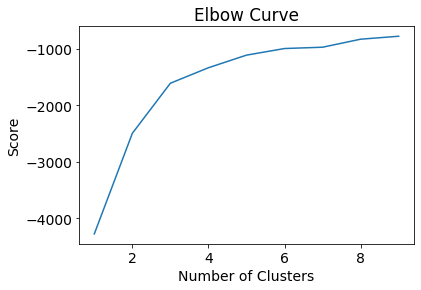

In [152]:
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [sklearn.cluster.MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Detecting outliers


In the next exercises, you're going to use the K-means algorithm to predict fraud, and compare those predictions to the actual labels that are saved, to sense check our results.

The fraudulent transactions are typically flagged as the observations that are furthest aways from the cluster centroid. You'll learn how to do this and how to determine the cut-off in this exercise. In the next one, you'll check the results.

Available are the scaled observations X_scaled, as well as the labels stored under the variable y.

In [153]:
y = df['fraud']

In [156]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = sklearn.cluster.MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

# Checking model results



In the previous exercise you've flagged all observations to be fraud, if they are in the top 5th percentile in distance from the cluster centroid. I.e. these are the very outliers of the three clusters. For this exercise you have the scaled data and labels already split into training and test set, so y_test is available. The predictions from the previous exercise, km_y_pred, are also available. Let's create some performance metrics and see how well you did.

In [163]:
# Obtain the ROC score
print('roc_auc', sklearn.metrics.roc_auc_score(y_test, km_y_pred))

# Create a confusion matrix
km_cm = sklearn.metrics.confusion_matrix(y_test, km_y_pred)

roc_auc 0.7592592592592593


In [178]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
#            xticklabels=['True', 'False'], 
#            yticklabels=['True', 'False'],
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax

Confusion matrix, without normalization


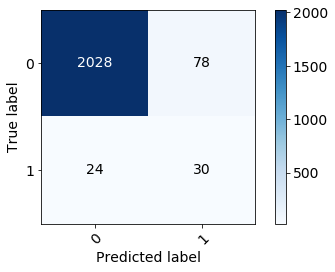

Normalized confusion matrix


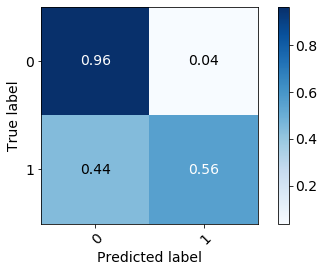

In [180]:
# def plot_confusion_matrix(km_cm):
#     plt.matshow(km_cm)
#     plt.xticks(ticks = [0, 1], labels=)
#     plt.yticks(ticks = [0, 1], labels=)
#     plt.colorbar()

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm, normalize=False)
plot_confusion_matrix(km_cm, normalize=True)

# DB scan



In this exercise you're going to explore using a density based clustering method (DBSCAN) to detect fraud. The advantage of DBSCAN is that you do not need to define the number of clusters beforehand. Also, DBSCAN can handle weirdly shaped data (i.e. non-convex) much better than K-means can. This time, you are not going to take the outliers of the clusters and use that for fraud, but take the smallest clusters in the data and label those as fraud. You again have the scaled dataset, i.e. X_scaled available. Let's give it a try!

In [187]:

# Initialize and fit the DBscan model
db = sklearn.cluster.DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in y else 0)

# Print performance metrics for DBscan
print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % sklearn.metrics.homogeneity_score(y, pred_labels))
print("Silhouette Coefficient: %0.3f" % sklearn.metrics.silhouette_score(X_scaled, pred_labels))

Estimated number of clusters: 23
Homogeneity: 0.611
Silhouette Coefficient: 0.739


# Assessing smallest clusters

In this exercise you're going to have a look at the clusters that came out of DBscan, and flag certain clusters as fraud:

you first need to figure out how big the clusters are, and filter out the smallest
then, you're going to take the smallest ones and flag those as fraud
last, you'll check with the original labels whether this does actually do a good job in detecting fraud.
Available are the DBscan model predictions, so n_clusters is available as well as the cluster labels, which are saved under pred_labels. Let's give it a try!

In [189]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels>=0])

# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

# Print the results 
print("The smallest clusters are clusters:")      
print(smallest_clusters)

The smallest clusters are clusters:
[21 17  9]


In [191]:
# Print the counts of the smallest clusters only
print("Their counts are n counts in the smallest clusters:")      
print(counts[smallest_clusters])

Their counts are n counts in the smallest clusters:
[10 15 15]


# Checking results

In this exercise you're going to check the results of your DBscan fraud detection model. In reality, you often don't have reliable labels and this where a fraud analyst can help you validate the results. He/She can check your results and see whether the cases you flagged are indeed suspicious. You can also check historically known cases of fraud and see whether your model flags them.

In this case, you'll use the fraud labels to check your model results. The predicted cluster numbers are available under pred_labels as well as the original fraud labels labels.

In [192]:
labels = y

In [193]:
# Create a dataframe of the predicted cluster numbers and fraud labels 
df = pd.DataFrame({'clusternr':pred_labels,'fraud':labels})

# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr']==21)|(df['clusternr']==17)|(df['clusternr']==9),1 , 0)

# Run a crosstab on the results 
print(pd.crosstab(df['fraud'], 
                  df['predicted_fraud'], 
                  rownames=['Actual Fraud'], 
                  colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6984  16
1               176  24
